# df creation
This notebook creates each of the data frames that may be used by other notebooks, based on the registrar's data.

__Table of contents__
- Coenrollment matrix: Coenrollment between exams
- Exam size: The number of students taking each exam
- By exam: List of students enrolled in each exam
- By student: List of exams taken by each student
- Exam courses: List of courses codes that are taking each exam


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Specify semester

### Importing the registrar data

In [2]:
df = pd.read_excel("fa22/fa22_StdntEnrl_09-10-2022.xlsx", dtype={'Section': 'str', 'Catalog': 'str'})

df['course'] = df['Subject'] +"-"+ df['Catalog']
exam_df = df[(df['Final Exam'] == 'Y') | (df['Final Exam'] == 'YO')]
exam_df = exam_df.sort_values(by=['PS Key']).reset_index()
exam_df = exam_df[~exam_df['Exam Group Key'].isna()]
exam_df['Exam Group Key'] = exam_df['Exam Group Key'].astype(str)

In [3]:
exam_df.head(5)

,index,ID,Term,Class Nbr,Course ID,Offer Nbr,Session,Section,Subject,Catalog,...,Mode,Comb Sect,Comb Sects ID,Acad Org,CrsAtr Val,PS Key,Final Exam,Location,Exam Group Key,course
0,21326,5019814,2825,17503,352628,2,1,001,AAS,2130,...,P,C,7993.0,AAS,NaN,AAS-2130-LEC-1-17503,Y,ITH,1-7993C,AAS-2130
1,26739,5178621,2825,17503,352628,2,1,001,AAS,2130,...,P,C,7993.0,AAS,NaN,AAS-2130-LEC-1-17503,Y,ITH,1-7993C,AAS-2130
2,17032,5018861,2825,17503,352628,2,1,001,AAS,2130,...,P,C,7993.0,AAS,NaN,AAS-2130-LEC-1-17503,Y,ITH,1-7993C,AAS-2130
3,23070,5275712,2825,17503,352628,2,1,001,AAS,2130,...,P,C,7993.0,AAS,NaN,AAS-2130-LEC-1-17503,Y,ITH,1-7993C,AAS-2130
4,44696,5174467,2825,17503,352628,2,1,001,AAS,2130,...,P,C,7993.0,AAS,NaN,AAS-2130-LEC-1-17503,Y,ITH,1-7993C,AAS-2130


In [4]:
exams = exam_df['Exam Group Key'].unique()

### Coenrollment matrix
Shows the number of students coenrolled in any pair of exams. The matrix has a column for each exam as well as a row for each exam. Each value represents the number of students coenrolled in the column exam and the row exam.

In [5]:
# Create a two column table -- first column is a unique student ID, second column is a list (with no duplicates) of the
# classes that student is enrolled in for finals.
by_student = exam_df.groupby('ID')['Exam Group Key'].apply(list).reset_index(name='Exam Groups')

# Initialize coenrollment matrix as Pandas DataFrame.
group_coenroll_matrix = pd.DataFrame(0, index=exams, columns=exams)

# Iterate through students' course lists:
# For each pairwise consideration of courses (i and j), add one to the (i,j) entry of the coenrollment matrix
for group_list in by_student['Exam Groups']:
    for i in group_list:
        for j in group_list:
            group_coenroll_matrix.at[i,j] += 1

for i in group_coenroll_matrix.columns:
    group_coenroll_matrix.at[i,i] = 0
group_coenroll_matrix.columns = group_coenroll_matrix.columns.astype(str)
group_coenroll_matrix.index = group_coenroll_matrix.index.astype(str)
group_coenroll_matrix.head()

,1-7993C,20152,12197,12448,MLG01,12233,MLG02,12444,12446,MLG03,...,6487,2326,2382,1-1636C,1-2734C,1-7436C,5606,4763,5467,4790
1-7993C,0,0,2,0,0,0,1,1,7,0,...,0,0,3,0,0,0,0,0,0,0
20152,0,0,2,8,0,0,2,0,14,0,...,0,0,0,1,1,0,0,0,0,0
12197,2,2,0,4,61,20,0,0,2,60,...,0,0,0,0,0,0,0,0,0,0
12448,0,8,4,0,0,0,3,0,50,2,...,0,2,0,1,0,0,0,0,0,0
MLG01,0,0,61,0,0,0,0,0,0,54,...,0,0,0,0,0,0,0,0,0,0


In [6]:
group_coenroll_matrix.to_csv('fa22/coenrollment_matrix.csv', header=True, index=True)

In [7]:
# Sample of importing the coenrollment matrix
# co = pd.read_csv('fa22/coenrollment_matrix.csv', index_col='Unnamed: 0')
# co.head(5)

### Exam size
Shows the number of students enrolled in each exam

In [8]:
exam_sizes = pd.DataFrame(exam_df.groupby(['Exam Group Key'])['ID'].count())
exam_sizes = exam_sizes.reset_index()
exam_sizes.columns = ['exam','size']
exam_sizes.head()

,exam,size
0,1-0111C,18
1,1-0295C,37
2,1-0305C,17
3,1-0337C,11
4,1-0363C,24


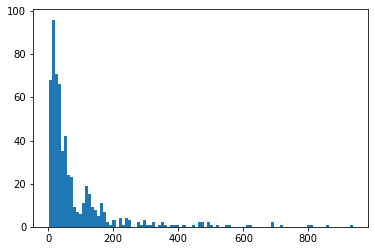

In [9]:
plt.hist(exam_sizes['size'], bins = 100);

In [10]:
exam_sizes.to_csv('fa22/exam_sizes.csv', header=True, index=False)

### By exam
For each exam, shows a list of students (by cornell ID) who are enrolled in that exam.

In [11]:
by_exam = exam_df.groupby('Exam Group Key')['ID'].apply(list).reset_index()
by_exam.columns = ['exam', 'students']
# by_exam['num'] = [len(i) for i in by_exam['ID']]  # number of students taking each exam
by_exam.head()

,exam,students
0,1-0111C,"[4870280, 5127371, 4992769, 5019059, 5019120, ..."
1,1-0295C,"[5235318, 5236934, 5137300, 5306558, 5235162, ..."
2,1-0305C,"[5257997, 5134680, 5057220, 5071246, 4906204, ..."
3,1-0337C,"[4997081, 5044246, 5054547, 4944321, 5063532, ..."
4,1-0363C,"[5179795, 5025162, 5261576, 5019685, 4570021, ..."


In [12]:
by_exam.to_csv('fa22/by_exam.csv', header=True, index=False)

### By student
For each student (by cornell ID), shows a list of the exams they are taking.

In [13]:
by_exam = exam_df.groupby('ID')['Exam Group Key'].apply(list).reset_index()
by_exam.columns = ['student', 'exams']
by_exam.head()

,student,exams
0,1008546,[19257]
1,1014228,[MLG34]
2,1021735,[1-7146C]
3,1086504,[1-0541C]
4,1105412,[1-8262C]


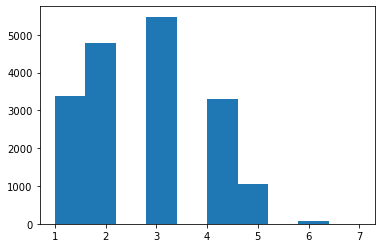

In [14]:
plt.hist(by_exam['exams'].apply(lambda x: len(x)));

In [15]:
by_student.to_csv('fa22/by_student.csv', header=True, index=False)

### Exam courses
All courses that fall under a certain exam

In [16]:
courses = exam_df[['course', 'Exam Group Key']].groupby(['Exam Group Key']).agg(['unique']).reset_index()
courses.columns = ['exam', 'courses']
courses.head()

,exam,courses
0,1-0111C,"[ENGL-3110, ENGL-6110, MEDVL-3110, MEDVL-6110]"
1,1-0295C,[PHYS-2217]
2,1-0305C,"[ASTRO-4445, PHYS-4445]"
3,1-0337C,"[LATA-2170, SPAN-2170]"
4,1-0363C,"[AEP-4500, AEP-5502, PHYS-4454]"


In [17]:
courses.to_csv('fa22/exam_courses.csv', header=True, index=False)